#Tutorial on Basic Feature extraction from speech signal#

This is a very basic tutorial on extraction of speech features, which can be utilized for different applications

FIrstly, you may need to install the libraries required.

# Load the data

You can either upload it or you can mount the drive with the corresponding audio in it

In [23]:
# from google.colab import drive
# drive.mount('/content/gdrive')


In [24]:
cd gdrive/MyDrive/Colab\ Notebooks

[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks'
/Users/mithindev/Desktop/COLLEGE


/Users/mithindev/Desktop/COLLEGE/env/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Common Features, Visualiztion & Information

Let us try to visualize the audio, perceive it and investigate some time-domain and frequency domain parameters

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np

* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* For more details refer this [link](https://matplotlib.org/stable/tutorials/index.html)
* librosa is a python package for music and audio analysis.
* For more details refer this [link](https://librosa.org/doc/latest/tutorial.html)


### load an audio file

In [26]:
demo_file='arctic_a0001.wav'
x , sr = librosa.load(demo_file,sr=None, mono=False)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [27]:
x.shape

(2, 112960)

In [28]:
sr

32000

### Waveform - loudness of the audio at a given time (time domain)

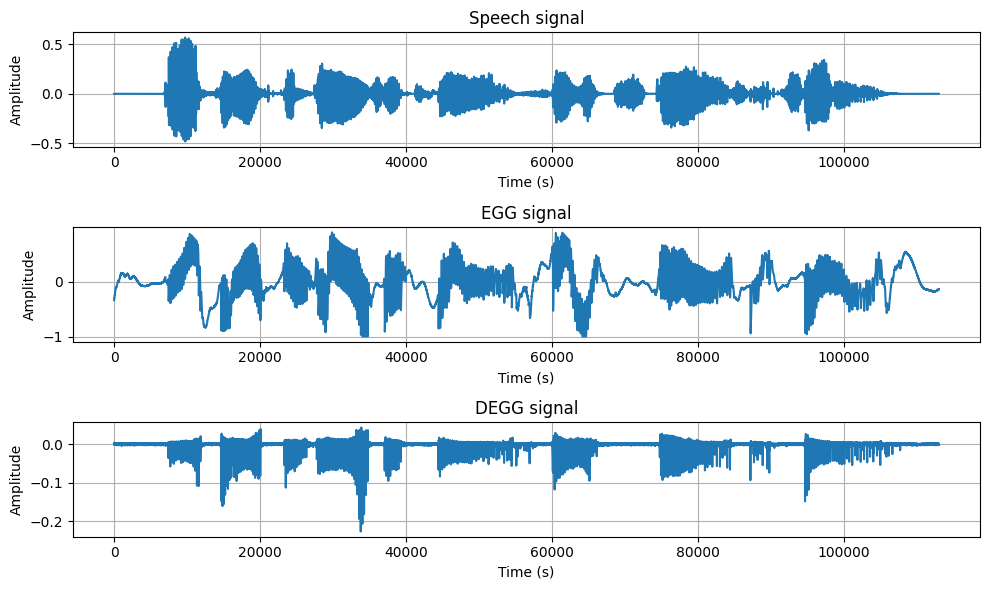

In [29]:
channel_1 = x[0, :]  # Access the first channel
channel_2 = x[1, :]  #second channel

# Creating time axis based on fs and length of signal
#time = np.arange(0, len(channel_1)) / sr

# plotting and fig size, we can adjust it
plt.figure(figsize=(10, 6))

# Plotting channel 1
plt.subplot(3, 1, 1)
plt.plot(channel_1, label='Speech signal')
plt.title('Speech signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot channel 2
plt.subplot(3, 1, 2)  # Create subplot in a 2x1 grid (bottom row)
plt.plot(channel_2, label='EGG signal')
plt.title('EGG signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

derivative_ch2 = np.diff(channel_2)

plt.subplot(3, 1, 3)
plt.plot( derivative_ch2, label='Derivative of EGG')
plt.title('DEGG signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


# Add legend and show the plot

plt.tight_layout()
plt.show()

### load an audio file with specific sampling rate

In [30]:
x , sr = librosa.load(demo_file, sr=16000)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [31]:
x

array([-0.12424845, -0.17901199, -0.1560819 , ..., -0.06860644,
       -0.06601478, -0.07098942], dtype=float32)

In [32]:
sr

16000

In [33]:
x.shape

(56480,)

### getting the audio duration

In [34]:
librosa.get_duration(y=x, sr=sr)

3.53

### playing audio

In [35]:
ipd.Audio(x, rate=sr)

### [Spectogram]

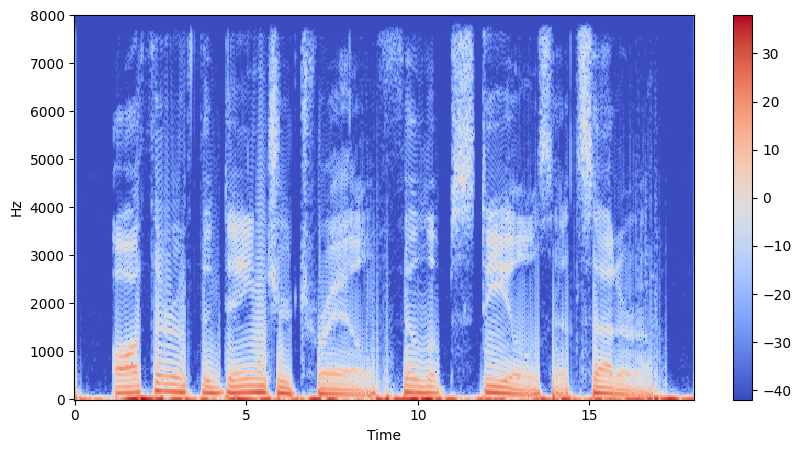

In [36]:
X = librosa.stft(x, n_fft= 512, win_length=400, window='hann',) # converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

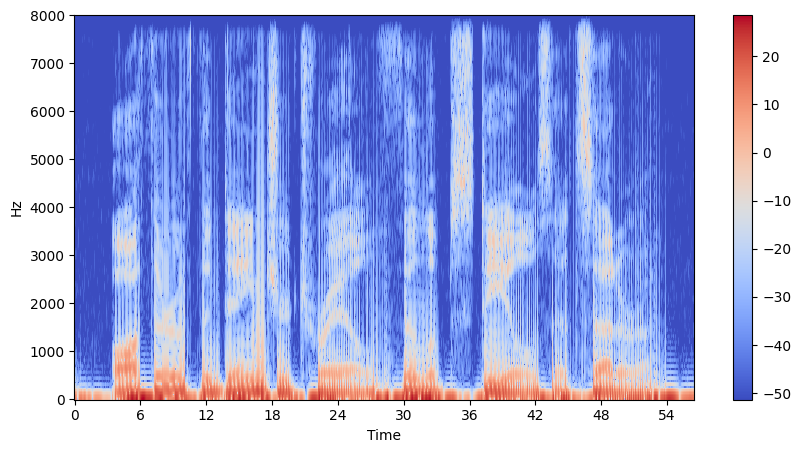

In [37]:
X = librosa.stft(x, n_fft= 512, win_length=128, window='hann') # converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') #log of frequencies
plt.colorbar()

### [Zero Crossing Rate](https://en.wikipedia.org/wiki/Zero-crossing_rate) - rate of sign-changes along a signal

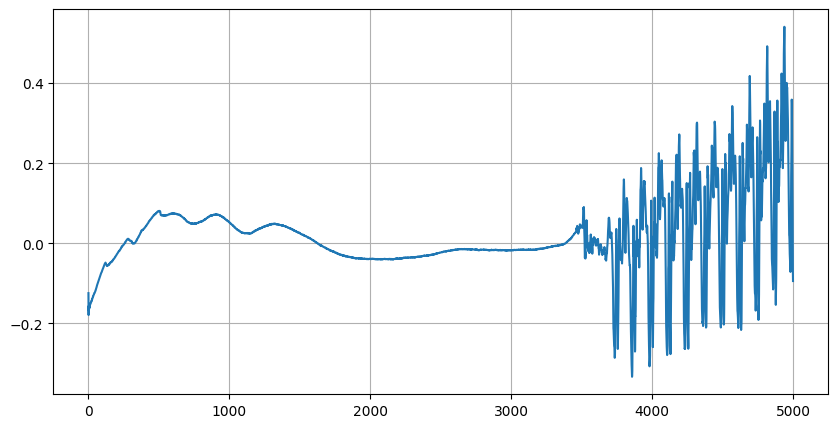

In [38]:
sig=x[:5000]
plt.figure(figsize=(10, 5))
plt.plot(sig)
plt.grid()

In [39]:
zero_crossings = librosa.zero_crossings(sig, pad=False)
print(sum(zero_crossings))

82


### [Spectral Centroid](https://en.wikipedia.org/wiki/Spectral_centroid) - weighted mean of the frequencies present in the sound.


The **spectral centroid**  indicates at which frequency the energy of a spectrum is centered upon. This is like a weighted mean:

$$ f_c = \frac{\sum_k S(k) f(k)}{\sum_k S(k)} $$

where $S(k)$ is the spectral magnitude at frequency bin $k$, $f(k)$ is the frequency at bin $k$.

[`librosa.feature.spectral_centroid`](https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html#librosa.feature.spectral_centroid) computes the spectral centroid for each frame in a signal:

In [40]:
#spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)
cent = librosa.feature.spectral_centroid(y=x, sr=sr)
cent.shape

(1, 111)

/var/folders/4w/t_rs_h2144q0rmw1kx3__qsc0000gn/T/ipykernel_31388/3040193520.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y=x), ref=np.max),


[Text(0.5, 1.0, 'log Power spectrogram')]

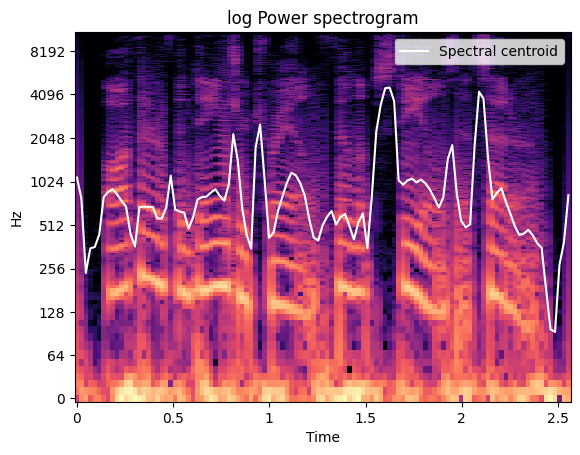

In [41]:

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y=x), ref=np.max),

                         y_axis='log', x_axis='time', ax=ax)

ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

**Autocorrelation**

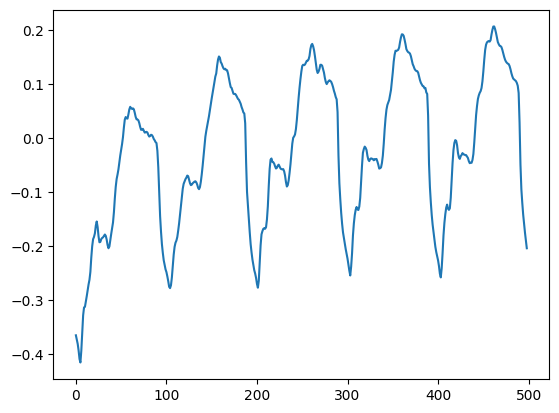

In [42]:
y=x[8001:8500]
plt.plot(y)

In [43]:
acf=librosa.autocorrelate(y)

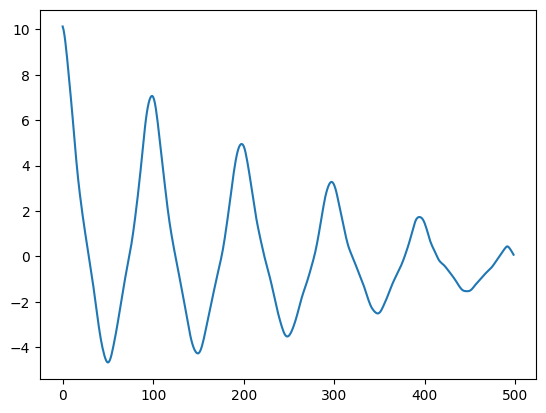

In [44]:
plt.plot(acf)

**Linear prediction Analysi**s

In [45]:
a = librosa.lpc(y, order=14)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)

NameError: name 'scipy' is not defined

Text(0.5, 1.0, 'LP Model Forward Prediction')

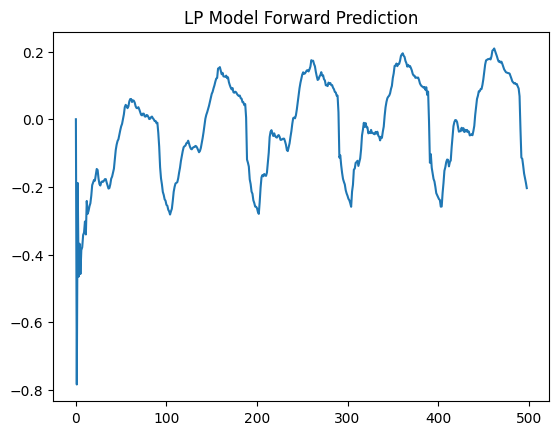

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_hat)
ax.set_title('LP Model Forward Prediction')

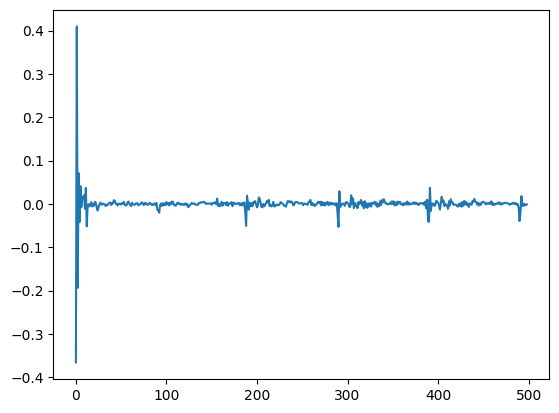

In [ ]:
er=y-y_hat
plt.plot(er)

### [MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) — Mel-Frequency Cepstral Coefficients

MFCCs are commonly derived as follows:

* Take the Fourier transform of (a windowed excerpt of) a signal.
* Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.
* Take the logs of the powers at each of the mel frequencies.
* Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
* The MFCCs are the amplitudes of the resulting spectrum.

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr,n_fft= 512, hop_length =200, win_length= 400, window='hann')
print(mfccs.shape)

(20, 283)


In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr,n_fft= 512, hop_length =200, win_length= 400, window='hann', n_mfcc=13)

print(mfccs.shape)

(13, 283)


Text(0, 0.5, 'MFCCs')

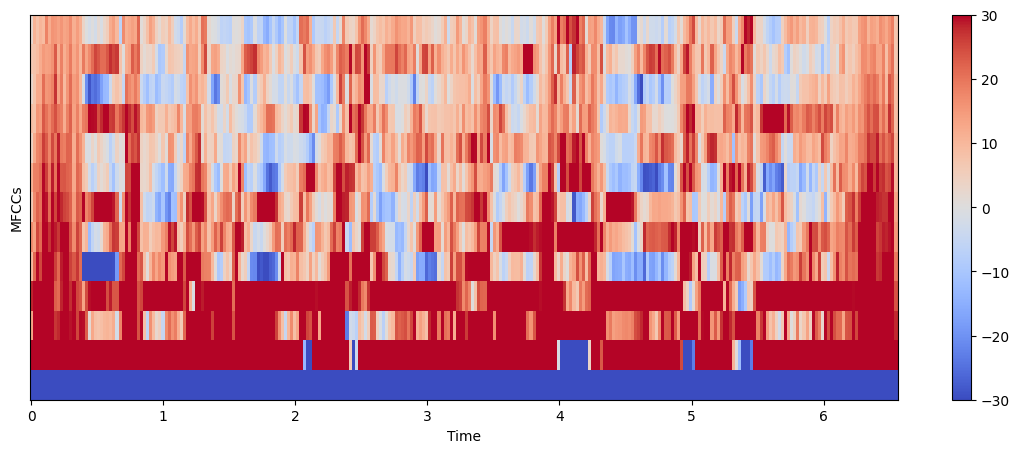

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFCCs')

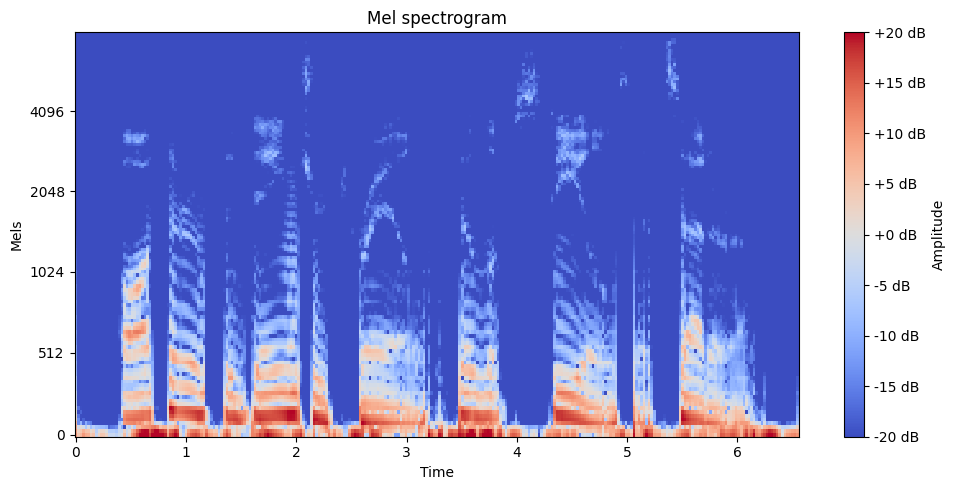

In [ ]:
melspectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000, n_fft= 512, hop_length =200, win_length= 400, window='hann')
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time',norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
melspectrogram.shape

(128, 283)

In [ ]:
print(melspectrogram)

[[2.7937841e+00 7.4578667e-01 1.1315939e+00 ... 3.5819402e+00
  3.9524829e+00 2.9209306e+00]
 [2.2195516e+00 4.7341082e-01 7.1572995e-01 ... 1.8968356e+00
  2.0967431e+00 1.6980540e+00]
 [1.6518669e+00 1.9596423e-01 2.9202422e-01 ... 1.6579591e-01
  1.9052735e-01 4.4637963e-01]
 ...
 [5.8920647e-05 3.4313263e-07 1.7691285e-07 ... 1.7392718e-07
  3.0944636e-07 2.6678568e-05]
 [3.9511579e-05 2.6054170e-07 9.1733909e-08 ... 1.2332585e-07
  1.5573792e-07 2.5663498e-05]
 [9.2823830e-06 7.6477065e-09 9.3762917e-09 ... 4.9586326e-09
  4.6810262e-09 1.9648403e-05]]


#saving the melspectrogram

In [ ]:
import pandas as pd
from google.colab import files
# Convert S to a DataFrame
df = pd.DataFrame(melspectrogram)
# Write the DataFrame to an Excel file
output_file = 'file.xlsx'
df.to_excel(output_file, index=False)
files.download(output_file)

### [Chromagram](https://en.wikipedia.org/wiki/Chroma_feature) - relates to the twelve different pitch classes

Represents the energy distribution of a signal’s frequency content across the 12 pitch classes

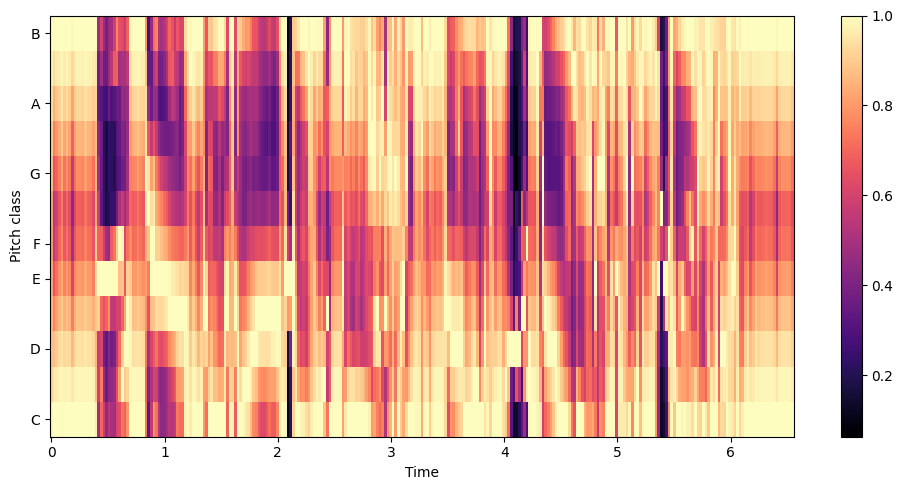

In [ ]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr,n_fft= 1024, win_length= 1024, window='hann')
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', cmap='magma')
plt.colorbar()
plt.tight_layout()